元データ

In [14]:
import pandas as pd
pd.read_csv('AirPassengers.csv').head(3)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132


データの可視化

Text(0,0.5,'passengers')

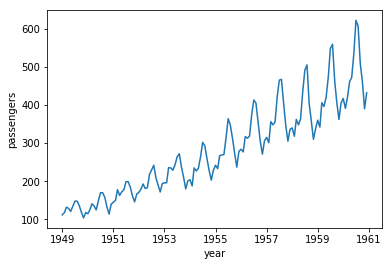

In [46]:
# 日付形式で読み込む
data = pd.read_csv('AirPassengers.csv',index_col='Month',parse_dates=True,dtype='float')
plt.plot(data["#Passengers"])
plt.xlabel('year')
plt.ylabel('passengers')

①指数化  
→このデータだと変化は全くなし。

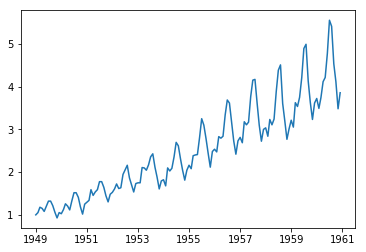

In [47]:
# 適当にはじめのデータを基準値においてみる
data = pd.read_csv('AirPassengers.csv',index_col='Month',parse_dates=True,dtype='float')
base = data.iloc[0].values[0]
data["#Passengers"] = data["#Passengers"]/base

plt.plot(data["#Passengers"])

→時系列間のデータの値の大きさを一定にする（経済分析においては”経済指数”と呼ばれるらしい）  
→給与データとかであれば、西暦末尾の数字が0や5の年を基準にしてボーナスの状況と基本給の違いを表したりする。  

②時系列データの変動分解  
調べると変動分解を簡単にしてくれるライブラリがあった(笑)  
今まで自分で頑張ってました、、、  

In [30]:
import statsmodels.api as sm
decomp = sm.tsa.seasonal_decompose(data)

Text(0,0.5,'Trend')

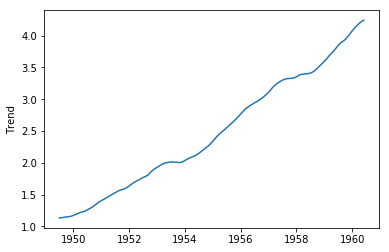

In [34]:
# 傾向変動のプロット
import statsmodels.api as sm
plt.plot(decomp.trend)
plt.ylabel('Trend')

Text(0,0.5,'Season')

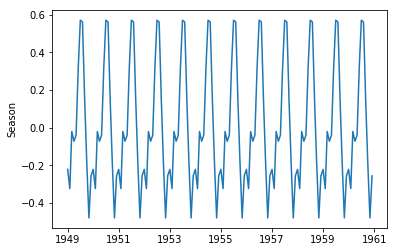

In [36]:
# 季節変動のプロット
plt.plot(decomp.seasonal)
plt.ylabel('Season')

Text(0,0.5,'Residual')

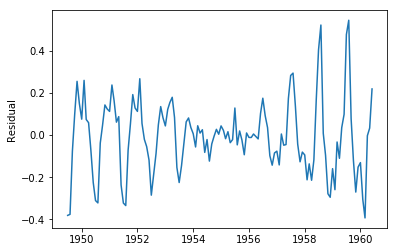

In [44]:
# 不規則変動のプロット
plt.plot(decomp.resid)
plt.ylabel('Residual')

③自己相関  
自己相関も簡単に表現してくれるライブラリがあるとは、、、(笑)  
原理はもちろん大事ですが、ライブラリを使ってさくっときれいな図を作成することも大事です(笑)

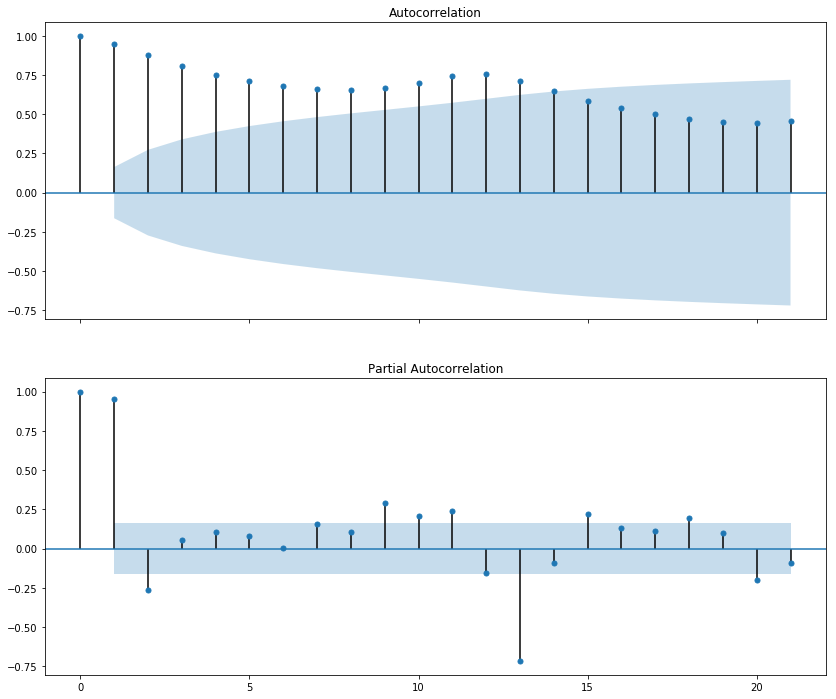

In [43]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(14,12))
sm.graphics.tsa.plot_acf(data, lags=21, ax=ax1)
sm.graphics.tsa.plot_pacf(data, lags=21, ax=ax2)
plt.show()